## Project Description:

This project demonstrates the use of a pre-trained BERT model (bert-base-uncased) from Hugging Face to extract contextual embeddings from text and visualize the self-attention mechanism.

It is divided into three parts:

BERT for Sentence Embeddings
Load BERT and its tokenizer, tokenize a sentence, and extract contextualized word embeddings from the model's last_hidden_state.

Manual Attention Mechanism
Define random query, key, and value matrices in PyTorch. Compute attention scores using dot products, apply softmax to obtain attention weights, and generate the weighted output.

Attention Weight Visualization
Load BERT with output_attentions=True, tokenize a sentence, extract attention tensors from the first layer, average across heads, and visualize token-wise attention using a heatmap.

### Outcomes:

By the end of this project, you will have a foundational understanding of how BERT works internally, how attention is computed, and how to visualize and interpret attention weights in transformer models.

### BERT EXAMPLE

In [ ]:
#pip install transformers

In [4]:
from transformers import BertModel, BertTokenizer
# Load a pre-trained BERI model and tokenizer
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased' )
model= BertModel.from_pretrained('bert-base-uncased')

tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

C:\Users\Dhruv\anaconda3\lib\site-packages\huggingface_hub\file_download.py:144: UserWarning: `huggingface_hub` cache-system uses symlinks by default to efficiently store duplicated files but your machine does not support them in C:\Users\Dhruv\.cache\huggingface\hub\models--bert-base-uncased. Caching files will still work but in a degraded version that might require more space on your disk. This warning can be disabled by setting the `HF_HUB_DISABLE_SYMLINKS_WARNING` environment variable. For more details, see https://huggingface.co/docs/huggingface_hub/how-to-cache#limitations.
To support symlinks on Windows, you either need to activate Developer Mode or to run Python as an administrator. In order to activate developer mode, see this article: https://docs.microsoft.com/en-us/windows/apps/get-started/enable-your-device-for-development
  warnings.warn(message)


vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

config.json:   0%|          | 0.00/570 [00:00<?, ?B/s]

Xet Storage is enabled for this repo, but the 'hf_xet' package is not installed. Falling back to regular HTTP download. For better performance, install the package with: `pip install huggingface_hub[hf_xet]` or `pip install hf_xet`


model.safetensors:   0%|          | 0.00/440M [00:00<?, ?B/s]

In [6]:
# Tokenize the input sentence
input_text = "Hello, how are you?"
inputs = tokenizer(input_text, return_tensors="pt")
# Pass the input through the model.
outputs = model(**inputs)
# Get the encoded output
encoded_output = outputs.last_hidden_state
print(encoded_output)

tensor([[[-0.0824,  0.0667, -0.2880,  ..., -0.3566,  0.1960,  0.5381],
         [ 0.0310, -0.1448,  0.0952,  ..., -0.1560,  1.0151,  0.0947],
         [-0.8935,  0.3240,  0.4184,  ..., -0.5498,  0.2853,  0.1149],
         ...,
         [-0.2812, -0.8531,  0.6912,  ..., -0.5051,  0.4716, -0.6854],
         [-0.4429, -0.7820, -0.8055,  ...,  0.1949,  0.1081,  0.0130],
         [ 0.5570, -0.1080, -0.2412,  ...,  0.2817, -0.3996, -0.1882]]],
       grad_fn=<NativeLayerNormBackward0>)


In this code, the BERT model (which uses a transformer encoder) processes the sentence “Hello, how are you?” and produces a contextualized representation of the sentence.

### ATTENTION EXAMPLE

In [10]:
import torch
import torch.nn.functional as F
# Define query, key, value matrices
query = torch.rand(1, 3, 5) # (batch_size, seg_len, embedding dim)
key = torch.rand (1, 3, 5)
value = torch.rand (1, 3, 5)
# Compute attention scores
attention_scores = torch.bmm(query, key.transpose(1, 2))
# Normalize scores with softmax
attention_weights = F.softmax(attention_scores, dim=-1)
# Compute weighted sum of values
output = torch.bmm(attention_weights, value)
print(output)

tensor([[[0.3796, 0.5130, 0.3839, 0.5542, 0.2929],
         [0.3180, 0.4984, 0.2658, 0.6489, 0.2675],
         [0.2991, 0.5295, 0.2455, 0.6448, 0.2791]]])


### VISUALIZE AND INTERPRET ATTENTION WEIGHTS

In [19]:
import torch
from transformers import BertTokenizer, BertModel 
import matplotlib.pyplot as plt 
import numpy as np
# Load model and tokenizer
model = BertModel.from_pretrained("bert-base-uncased" , output_attentions=True)
tokenizer = BertTokenizer.from_pretrained("bert-base-uncased")
# Tokenize input
input_text = "The quick brown fox jumps over the lazy dog"
inputs = tokenizer (input_text, return_tensors="pt")
# Get outputs including attention weights
outputs = model(**inputs)
attentions = outputs.attentions

In [16]:
# Select attention for the first layer
attention = attentions[0].mean(dim=1)# average across heads
# Average across heads
# Convert attention tensor
attention_weights = attention[0].detach().numpy()
# Get the tokenized words
tokens = tokenizer.convert_ids_to_tokens(inputs['input_ids'][0])

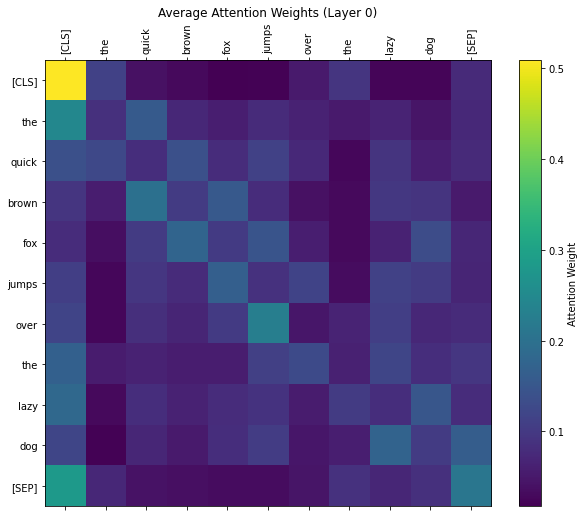

In [20]:
 #Plot the attention weights for each token
plt.figure(figsize= (10, 8))
plt.matshow(attention_weights, cmap='viridis', fignum=1) # Use a colormap for better visualization
plt.title ("Average Attention Weights (Layer 0)")

# Add a colorbar to show the scale of attention weights
plt.colorbar (label='Attention Weight')
# Set x and y axis labels with the token names
plt.xticks(ticks=np.arange(len(tokens)), labels=tokens, rotation=90)
plt.yticks(ticks=np.arange(len(tokens)), labels=tokens)
# Show the plot
plt.show()